Compute Spearman correlation coefficients across all sample replicates 

In [3]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex_dev
sbatch \
    -pnew,all \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Alex/collab/20190701_Matt/logs/chipseq.multiBigwigSummary.out \
    <<'EOF'
#!/bin/bash

multiBigwigSummary bins \
    --numberOfProcessors 16 \
    --labels $(find  /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/ -type f -iname "*.dedup.sorted.rpkm.bw" | /bin/grep -v input | sort | xargs -I{} basename {} | sed 's@.masked.dedup.sorted.rpkm.bw@@') \
    -b $(find  /data/reddylab/Alex/collab/20190701_Matt/processing/chip_seq/Matt_5756_190620B1-se-with-control/ -type f -iname "*.dedup.sorted.rpkm.bw" | /bin/grep -v input | sort) \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/qc/multiBigwigSummary.results.npz
EOF


Submitted batch job 19584695


In [6]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate alex_dev
sbatch \
    --depend=afterok:19584695 \
    -pnew,all \
    --mem=32G \
    -o /data/reddylab/Alex/collab/20190701_Matt/logs/chipseq.plotCorrelation.out \
    <<'EOF'
#!/bin/bash

plotCorrelation \
    -in /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/qc/multiBigwigSummary.results.npz \
    --corMethod spearman \
    --skipZeros \
    --plotNumbers \
    --plotTitle "Spearman Correlation of Average Reads in Bins" \
    --whatToPlot scatterplot \
    -o /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/qc/scatterplot.SpearmanCorr.png   \
    --outFileCorMatrix /data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/qc/scatterplot.SpearmanCorr.tab
EOF


Submitted batch job 19584762


In [10]:
import pandas as pd
df = pd.read_csv('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/qc/scatterplot.SpearmanCorr.tab', 
                 sep='\t', index_col=0)

In [15]:
?sns.heatmap

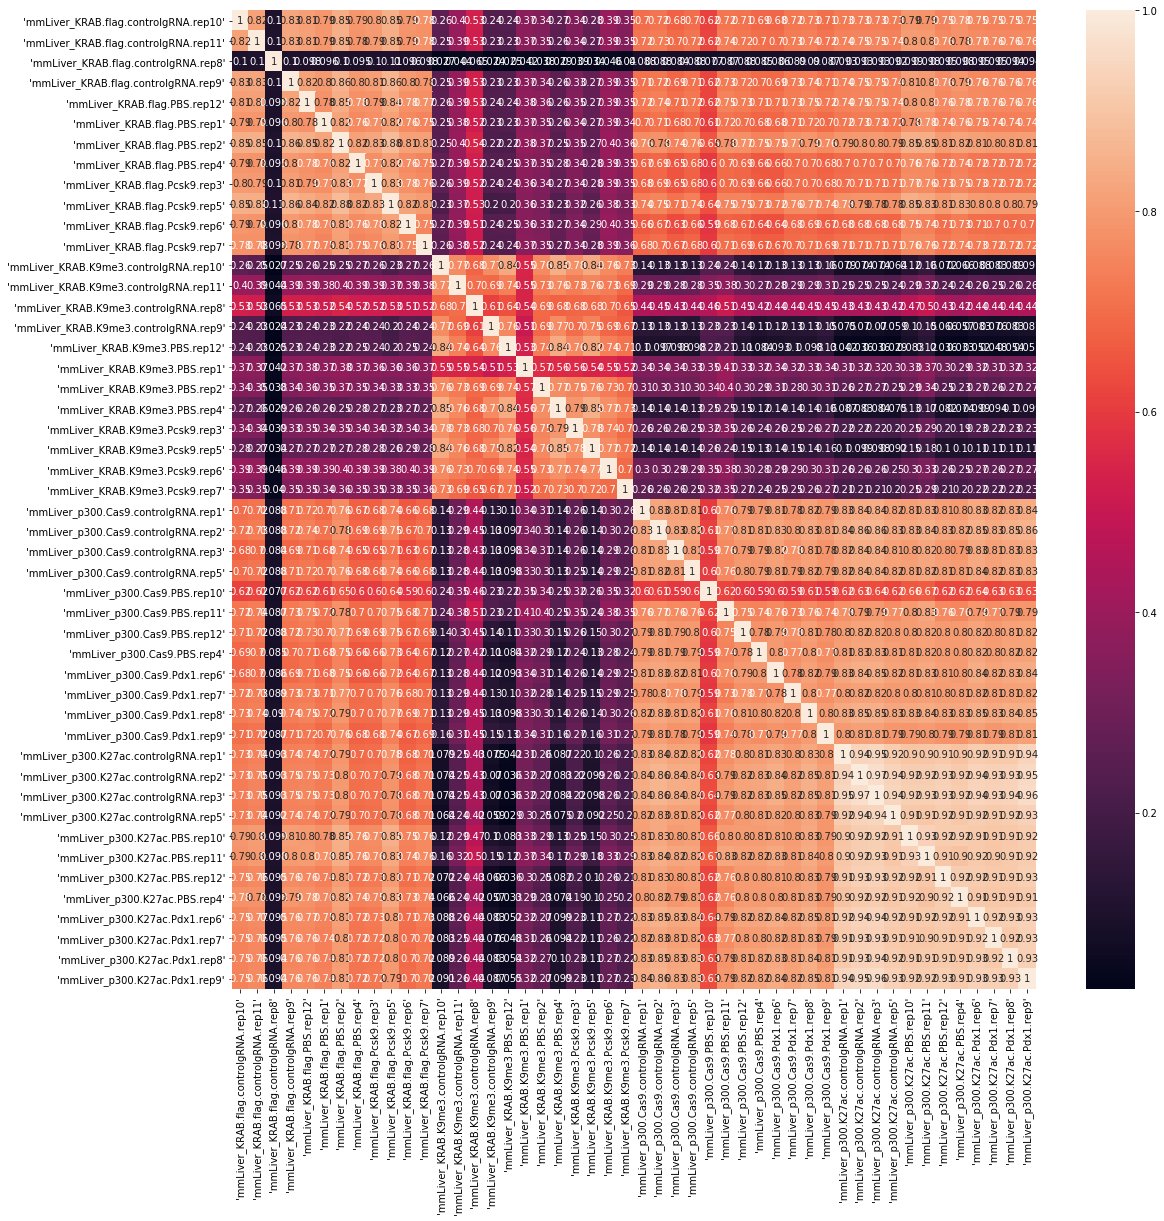

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=[18, 18])
sns.heatmap(df, annot=True)

In [4]:
from IPython.display import Image

In [7]:
#Image('/data/reddylab/Alex/collab/20190701_Matt/results/chip_seq/qc/scatterplot.SpearmanCorr.png')